In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/sample_data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
df.isna().sum().sort_values(ascending=False)
df_null = df.isna().mean()
df_null.head(60)
df_null_cols= df_null[df_null > 0.6].index
df_1 = df.drop(df_null_cols, axis=1)

In [ ]:
for x in df_1.columns:
  print (f"columns name {x}  and unique values {df[x].unique()}")

columns name Id  and unique values [   1    2    3 ... 1458 1459 1460]
columns name MSSubClass  and unique values [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
columns name MSZoning  and unique values ['RL' 'RM' 'C (all)' 'FV' 'RH']
columns name LotFrontage  and unique values [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
columns name LotArea  and unique values [ 8450  9600 11250 ... 17217 13175  9717]
columns name Street  and unique values ['Pave' 'Grvl']
column

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

Error in callback <function flush_figures at 0x7bf775e31940> (for post_execute):


KeyboardInterrupt: 

Id


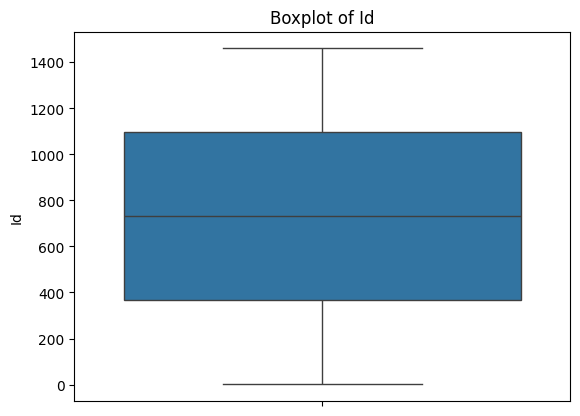

MSSubClass


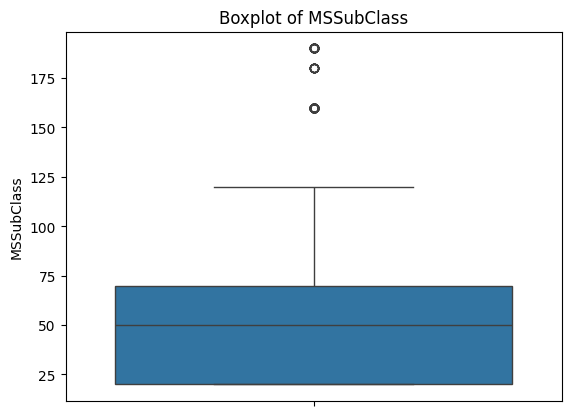

MSZoning


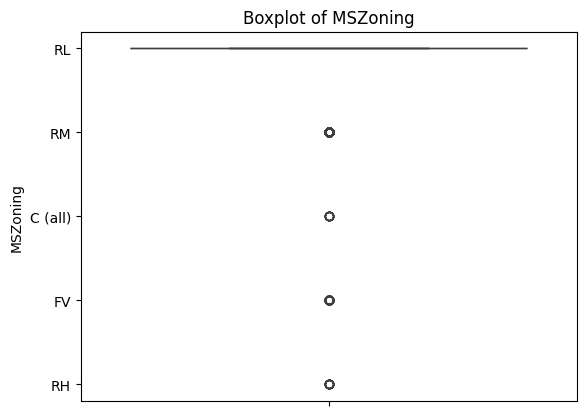

LotFrontage


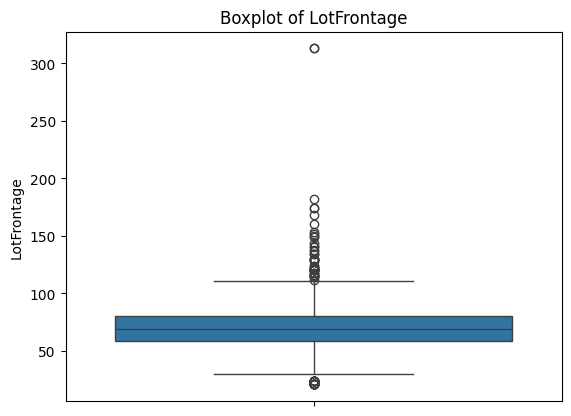

LotArea


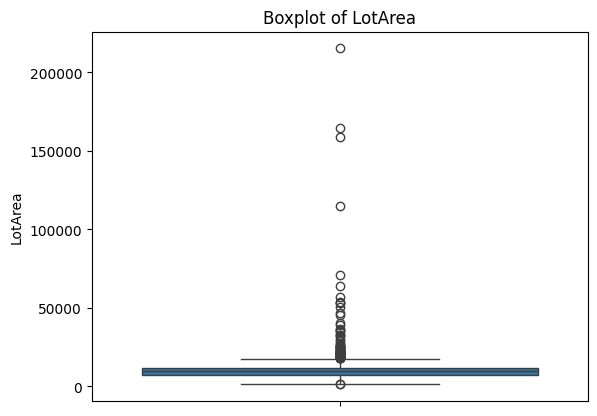

Street


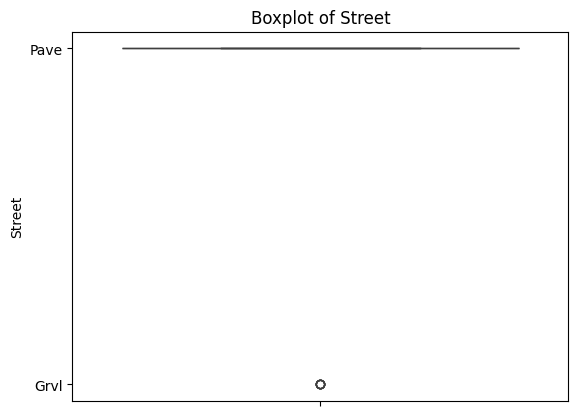

Alley


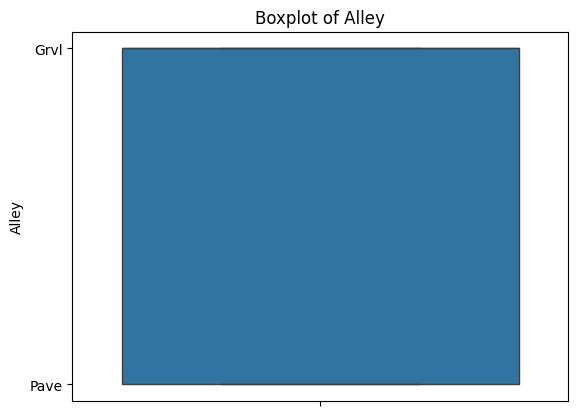

LotShape


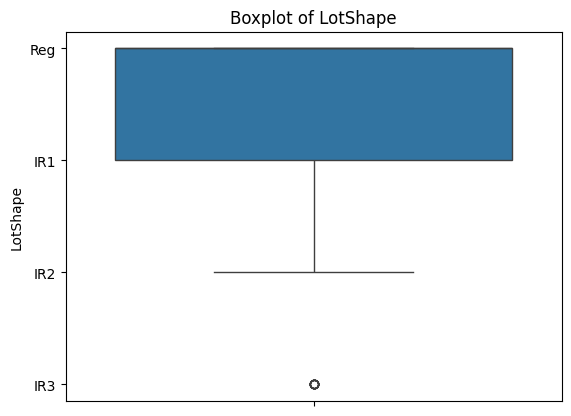

LandContour


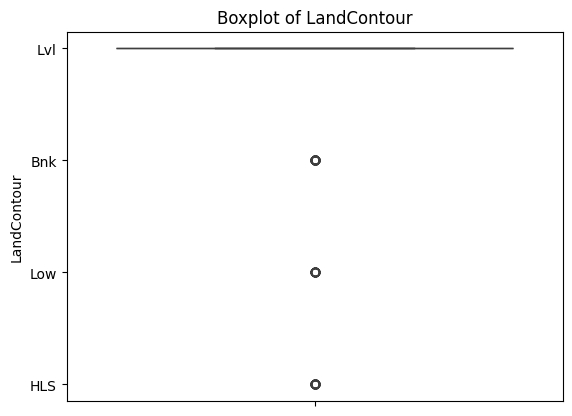

Utilities


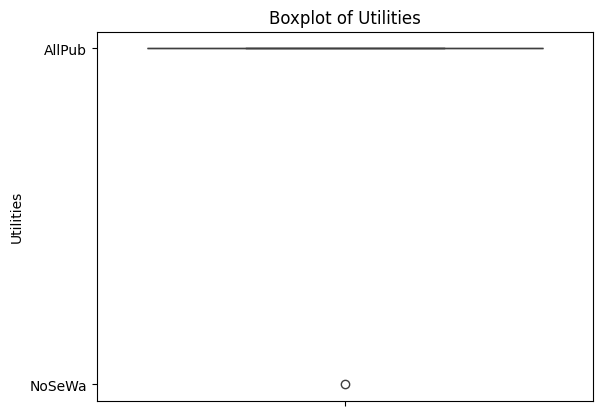

LotConfig


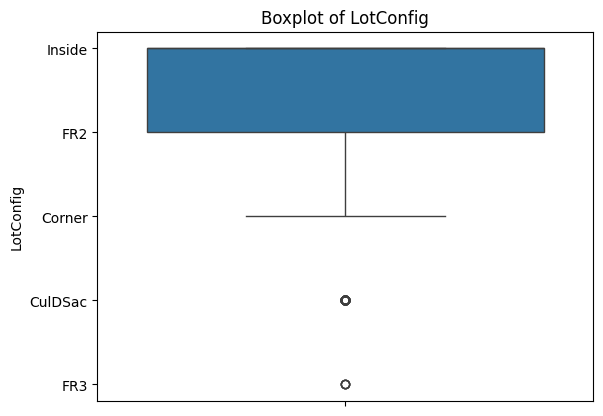

LandSlope


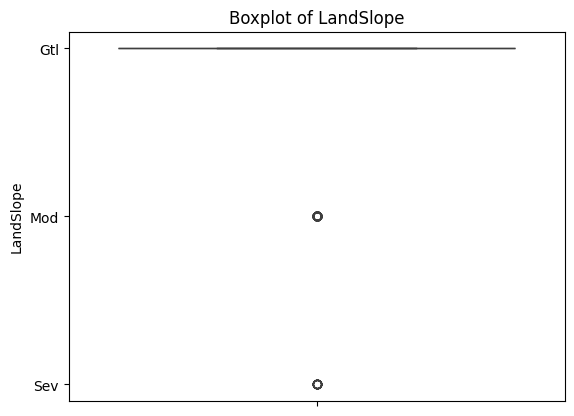

Neighborhood


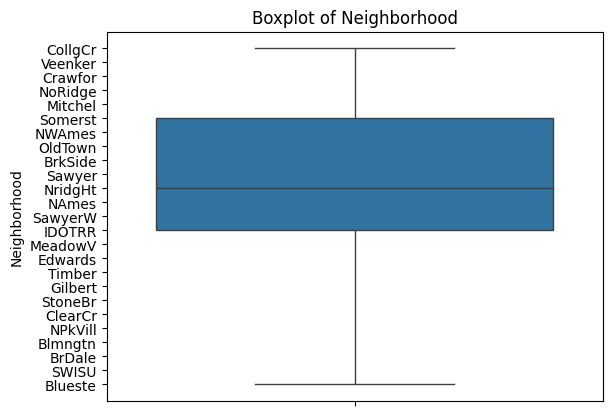

Condition1


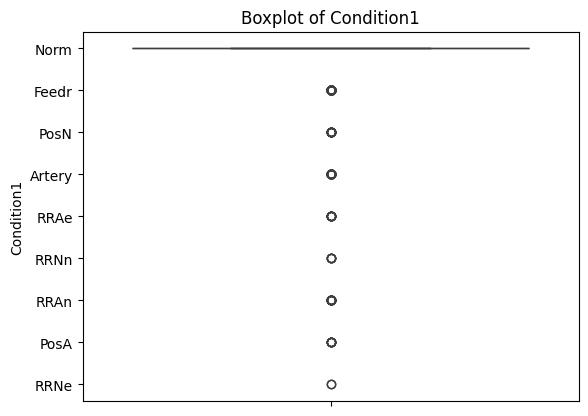

Condition2


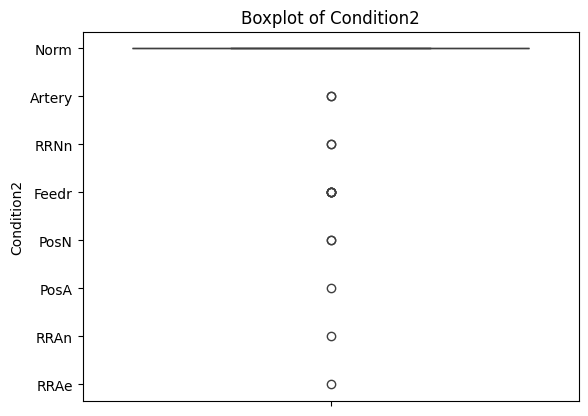

BldgType


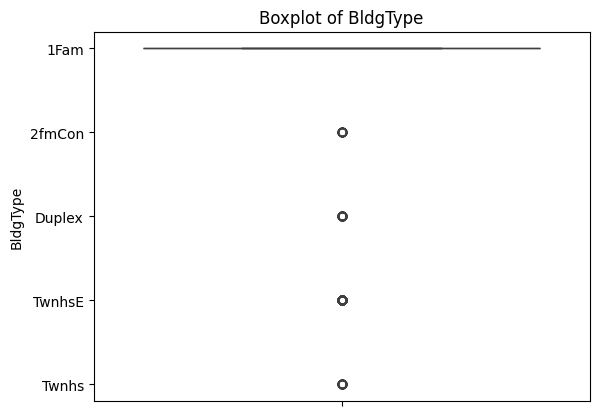

HouseStyle


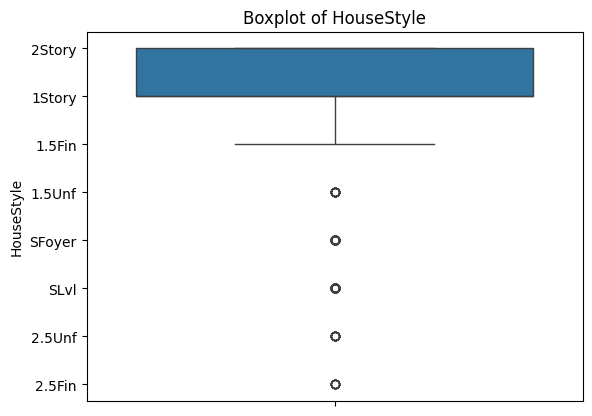

OverallQual


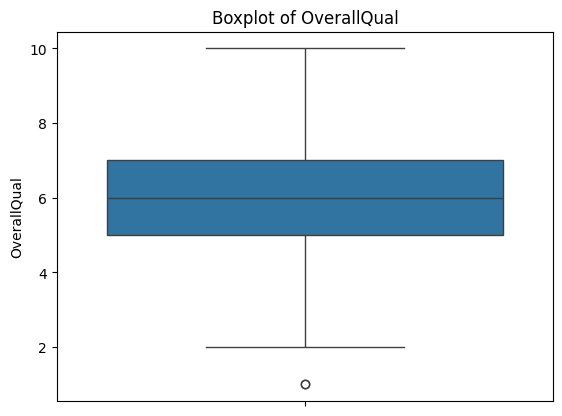

OverallCond


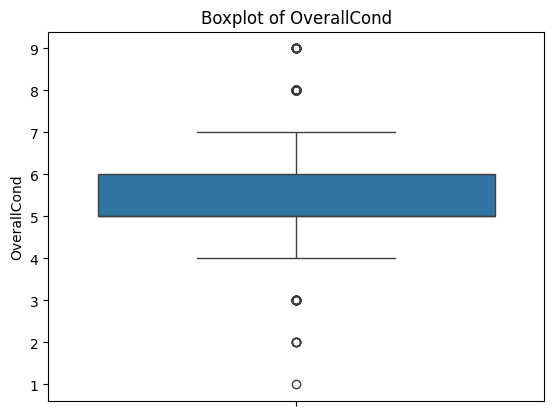

YearBuilt


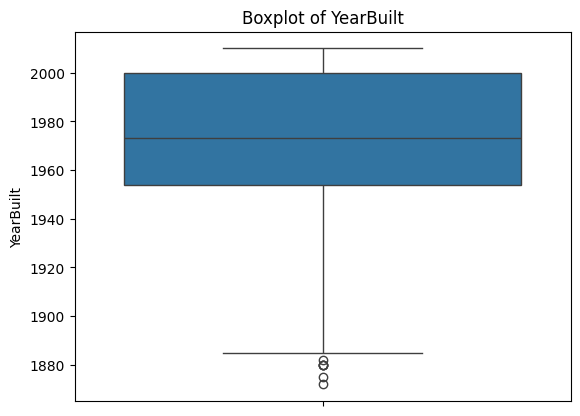

YearRemodAdd


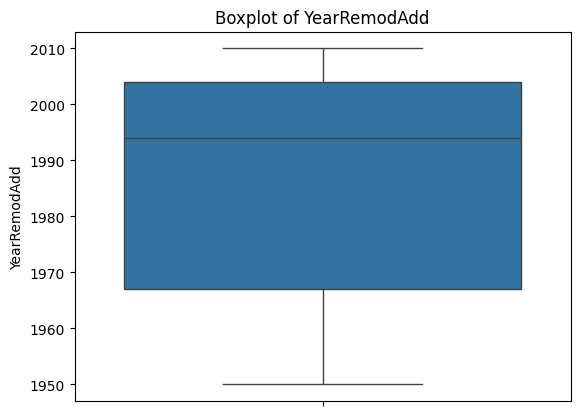

RoofStyle


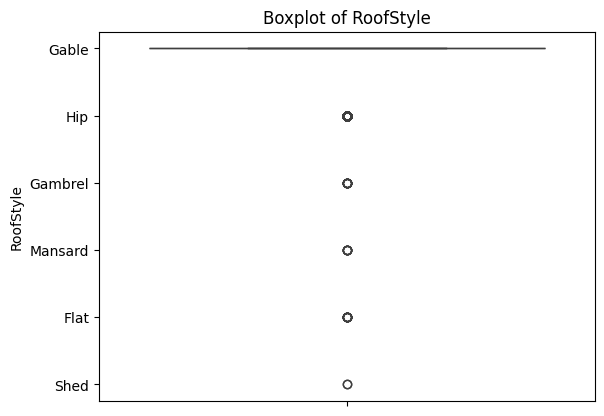

RoofMatl


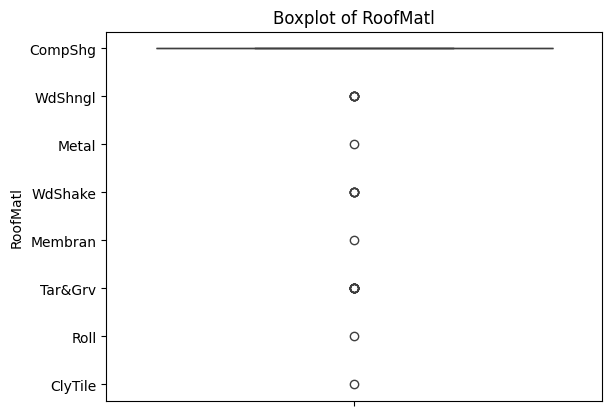

Exterior1st


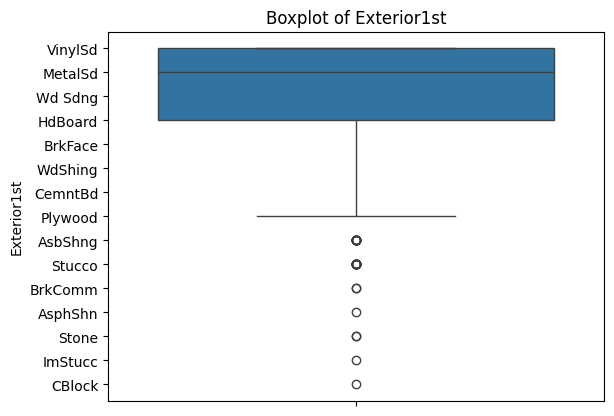

Exterior2nd


KeyboardInterrupt: 

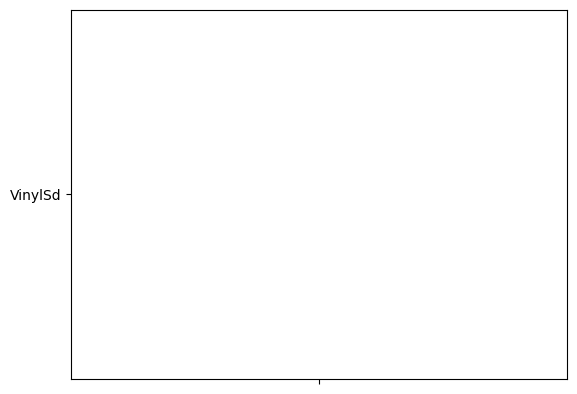

In [ ]:
for x in df.columns:
  print(x)
  sns.boxplot(df[x])
  plt.title(f'Boxplot of {x}')
  plt.show()

In [ ]:
for x in df.columns:
  sns.scatterplot(df[x])
  plt.title(f'Scatterplot of {x}')
  plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler


In [ ]:
print(df.select_dtypes(include=['object']).columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
ordinal_cols=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']


ordinal_cols = [
    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
    "BsmtFinType1", "HeatingQC", "KitchenQual",
    "FireplaceQu", "GarageQual", "GarageCond"
]

qual_order = ["Po", "Fa", "TA", "Gd", "Ex"]
bsmtfin_order = ["Unf", "LwQ", "BLQ", "ALQ", "GLQ"]

ordinal_categories = [
    qual_order,         # ExterQual
    qual_order,         # ExterCond
    qual_order,         # BsmtQual
    qual_order,         # BsmtCond
    bsmtfin_order,      # BsmtFinType1
    qual_order,         # HeatingQC
    qual_order,         # KitchenQual
    qual_order,         # FireplaceQu
    qual_order,         # GarageQual
    qual_order          # GarageCond
]

df_col = df.select_dtypes(include=['object']).columns
onehot_cols = []

for x in df_col:
  if x not in ordinal_cols:
    onehot_cols.append(x)


#num_col=df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
print(onehot_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
x=df.drop(['SalePrice'], axis=1)
y=df['SalePrice']
num_col=x.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1))
])

# one-hot + imputation
onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# numeric imputation
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pre_prossesor = ColumnTransformer(
    transformers=[
        ('ordinal_encoder', ordinal_pipeline, ordinal_cols),
        ('onehot_encoder', onehot_pipeline, onehot_cols),
        ('scaler', numeric_pipeline, num_col)
    ]
)


In [ ]:
from sklearn.linear_model import LinearRegression

model_pipeline = Pipeline(steps=[
    ("preprocess", pre_prossesor),
    ("model", LinearRegression())
])

In [ ]:
model_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['Unf',
                                                                                               'LwQ',
                                                                                               'BLQ',
                                                                                               'ALQ',
                                                                                               'GLQ'],
                                                                                              ['Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'E...
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
model_pipeline.predict(x_test)

array([148800.12520406, 335345.63523166,  96531.9228857 , 174740.61300683,
       306137.39949282,  73072.68768259, 237350.41411397, 142940.37362452,
        58775.33538335, 153872.1506974 , 139031.32266421, 105127.71469142,
        56507.62730379, 237110.89291097, 160379.98785649, 138384.2408891 ,
       191480.44075509, 120051.59443648, 130686.60275808, 219257.99890059,
       135198.25275006, 204734.4540534 , 176285.92208786, 125543.74351458,
       201496.75956758, 130985.58696706, 195826.3293806 ,  93536.22424812,
       165377.4613281 , 190910.50754799, 151636.96508582, 294923.17041274,
       237898.92880802, 106216.62863325, 241901.39759631, 142178.17068566,
       125688.90094905, 204917.31708484, 302617.06301318, 100454.48381471,
       123307.82387047, 230275.31516981,  91883.3694359 , 348646.54483546,
       134228.08282757, 126110.8097767 ,  90702.60041214, 138227.51674207,
       404216.47572916, 140786.60205015, 121653.92316539, 270161.66428482,
       104224.6326356 , 3

In [ ]:
y_test_predict=model_pipeline.predict(x_test)
y_train_predict=model_pipeline.predict(x_train)

In [ ]:
new_test=pd.read_csv('/content/sample_data/test.csv')
new_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
new_pred = model_pipeline.predict(new_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- Train ---
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
train_mae  = mean_absolute_error(y_train, y_train_predict)
train_r2   = r2_score(y_train, y_train_predict)

# --- Test ---
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
test_mae  = mean_absolute_error(y_test, y_test_predict)
test_r2   = r2_score(y_test, y_test_predict)

print("\n===== TRAIN METRICS =====")
print("RMSE :", train_rmse)
print("MAE  :", train_mae)
print("R²   :", train_r2)

print("\n===== TEST METRICS =====")
print("RMSE :", test_rmse)
print("MAE  :", test_mae)
print("R²   :", test_r2)


===== TRAIN METRICS =====
RMSE : 21278.438639972697
MAE  : 14202.879643084838
R²   : 0.9240895084915848

===== TEST METRICS =====
RMSE : 29933.97188476151
MAE  : 19617.19546701848
R²   : 0.8831806303155533


In [ ]:
new_pred

array([121197.53114527, 163561.64755309, 177662.34337156, ...,
       171616.98970601, 109682.02766187, 231885.46237637])

In [ ]:
submission = pd.DataFrame({
    "Id": new_test["Id"],
    "SalePrice": new_pred
})

submission.to_csv("submission.csv", index=False)